In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import os
from sklearn.preprocessing import StandardScaler 


# PROBLEM -1 
A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

In [3]:
os.chdir('C:\\Users\\user\\Desktop\\Great Lakes\\Advance Statistics\\Project')

In [4]:
data = pd.read_csv('Fever.csv')

# Checking the top 5 records

In [5]:
data.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

# Checking the shape and information of the dataframe


In [6]:
data.shape

(36, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


# Checking the summary of the dataframe

In [8]:
data.describe(include='all')

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

# Checking distinct values of Design of A and B and Volunteer


In [10]:
data.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [11]:
data.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [12]:
data.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

# 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [19]:
formula = 'Relief ~C(A)'
model = ols(formula,data).fit()
aov_table = anova_lm(model)
print (aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


# 1.3)Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [22]:
formula = 'Relief ~C(B)'
model = ols(formula,data).fit()
aov_table = anova_lm(model)
print (aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


# 1.4) Analyse the effects of one variable on another with the help of an interaction plot.

What is an interaction between two treatments?


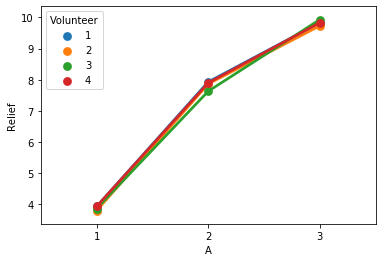

In [30]:
sns.pointplot(x = 'A' , y= 'Relief' , data = data , hue = 'Volunteer' , ci =None)

In [ ]:
# as we can see from the figure above by increasing the level of Compound A, Relief rate increases
# therefore we can say that Compound A is significant cause of Relief

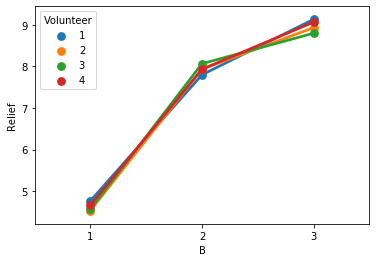

In [8]:
sns.pointplot(x = 'B' , y= 'Relief' , data = data , hue = 'Volunteer' , ci =None)

In [ ]:
#As we can see from the figure above by increasing the level of Compound B. 
#Relief rate increases. Therefore we can say that Compound B is significant cause of Relief.

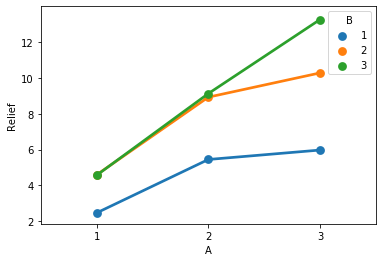

In [9]:
sns.pointplot(x='A',y='Relief',hue='B',data=data,ci=None)

In [ ]:
# as we can see from the figure above 
# by increasing the level of Compound B with Compound A the Relief rate is not increasing rapidly
# or we can say that level 1 of Compound A and level 1 of Compound B 
# gives best result as we can get faster relief from hay fever

In [33]:
#Interaction Effect
model = ols('Relief ~ C(A) +C(B) +C(A):C(B)', data= data).fit()
aov_table = anova_lm(model)
print (aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [34]:
#Interaction Effect
model = ols('Relief~Volunteer + C(A)+C(B)+C(A):C(B)',data= data).fit()
aov_table = anova_lm(model)
print (aov_table)

             df      sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020000  110.010000  1760.400739  1.765119e-28
C(B)        2.0  123.660000   61.830000   989.415305  2.935240e-25
C(A):C(B)   4.0   29.425000    7.356250   117.716098  2.938033e-16
Volunteer   1.0    0.000222    0.000222     0.003556  9.529043e-01
Residual   26.0    1.624778    0.062491          NaN           NaN


# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

In [6]:
formula = 'Relief ~C(A) +C(B)+ C(A):C(B)'
model = ols(formula,data).fit()
anova_table = anova_lm(model)
print (anova_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


# 1.6) Mention the business implications of performing ANOVA for this particular case study.


In [ ]:
#1. We can see if the level of Compound A increases, the Relief rate increases which is not desirable from the business perspective.
# 2. We can see if the level of Compound B increases, the Relief rate increases which is not desirable from the business perspective.
#3. From interaction in two way Anova we can see that there is statistical interaction with compound A & B. Relief varies with interaction of compound A & B
 #4. As we can see from the interaction plot above Level 1 of Compound A & Level 1 of Compound B, gives a value between 2 and 4 hours of Relief time which is minimum and desirable.


# Problem 2:

The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [5]:
os.chdir('C:\\Users\\user\\Desktop\\Great Lakes\\Advance Statistics\\Project\\PCA')

In [6]:
data_df = pd.read_csv('Education+-+Post+12th+Standard.csv')

# 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [24]:
data_df.head(10).T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                                 1660                2186            1428   
Accept                               1232                1924            1097   
Enroll                                721                 512             336   
Top10perc                              23                  16              22   
Top25perc                              52                  29              50   
F.Undergrad                          2885                2683            1036   
P.Undergrad                           537                1227              99   
Outstate                             7440               12280           11250   
Room.Board                           3300                6450            3750   
Books                                 450                 750             400   
Personal                             2200                1500            1165   
PhD                                    70                  29              53   
Terminal                               78                  30              66   
S.F.Ratio                            18.1                12.2            12.9   
perc.alumni                            12                  16              30   
Expend                               7041               10527            8735   
Grad.Rate                              60                  56              54   

                               3                          4  \
Names        Agnes Scott College  Alaska Pacific University   
Apps                         417                        193   
Accept                       349                        146   
Enroll                       137                         55   
Top10perc                     60                         16   
Top25perc                     89                         44   
F.Undergrad                  510                        249   
P.Undergrad                   63                        869   
Outstate                   12960                       7560   
Room.Board                  5450                       4120   
Books                        450                        800   
Personal                     875                       1500   
PhD                           92                         76   
Terminal                      97                         72   
S.F.Ratio                    7.7                       11.9   
perc.alumni                   37                          2   
Expend                     19016                      10922   
Grad.Rate                     59                         15   

                             5                        6               7  \
Names        Albertson College  Albertus Magnus College  Albion College   
Apps                       587                      353            1899   
Accept                     479                      340            1720   
Enroll                     158                      103             489   
Top10perc                   38                       17              37   
Top25perc                   62                       45              68   
F.Undergrad                678                      416            1594   
P.Undergrad                 41                      230              32   
Outstate                 13500                    13290           13868   
Room.Board                3335                     5720            4826   
Books                      500                      500             450   
Personal                   675                     1500             850   
PhD                         67                       90              89   
Terminal                    73                       93             100   
S.F.Ratio                  9.4                     11.5            13.7   
perc.alumni                 11                       26              37   
Expend                    9

# Get the dimension

In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [42]:
data_df.shape

(777, 18)

# Summary of the dataset


In [40]:

data_df.describe(include='all').T

count unique                                 top freq     mean  \
Names         777    777  University of Southern Mississippi    1      NaN   
Apps          777    NaN                                 NaN  NaN  3001.64   
Accept        777    NaN                                 NaN  NaN   2018.8   
Enroll        777    NaN                                 NaN  NaN  779.973   
Top10perc     777    NaN                                 NaN  NaN  27.5586   
Top25perc     777    NaN                                 NaN  NaN  55.7967   
F.Undergrad   777    NaN                                 NaN  NaN  3699.91   
P.Undergrad   777    NaN                                 NaN  NaN  855.299   
Outstate      777    NaN                                 NaN  NaN  10440.7   
Room.Board    777    NaN                                 NaN  NaN  4357.53   
Books         777    NaN                                 NaN  NaN  549.381   
Personal      777    NaN                                 NaN  NaN  1340.64   
PhD           777    NaN                                 NaN  NaN  72.6602   
Terminal      777    NaN                                 NaN  NaN  79.7027   
S.F.Ratio     777    NaN                                 NaN  NaN  14.0897   
perc.alumni   777    NaN                                 NaN  NaN  22.7439   
Expend        777    NaN                                 NaN  NaN  9660.17   
Grad.Rate     777    NaN                                 NaN  NaN  65.4633   

                 std   min   25%   50%    75%    max  
Names            NaN   NaN   NaN   NaN    NaN    NaN  
Apps          3870.2    81   776  1558   3624  48094  
Accept       2451.11    72   604  1110   2424  26330  
Enroll       929.176    35   242   434    902   6392  
Top10perc    17.6404     1    15    23     35     96  
Top25perc    19.8048     9    41    54     69    100  
F.Undergrad  4850.42   139   992  1707   4005  31643  
P.Undergrad  1522.43     1    95   353    967  21836  
Outstate     4023.02  2340  7320  9990  12925  21700  
Room.Board    1096.7  1780  3597  4200   5050   8124  
Books        165.105    96   470   500    600   2340  
Personal     677.071   250   850  1200   1700   6800  
PhD          16.3282     8    62    75     85    103  
Terminal     14.7224    24    71    82     92    100  
S.F.Ratio    3.95835   2.5  11.5  13.6   16.5   39.8  
perc.alumni  12.3918     0    13    21     31     64  
Expend       5221.77  3186  6751  8377  10830  56233  
Grad.Rate    17.1777    10    53    65     78    118

# Check for null values

In [45]:
data_df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

# Check for duplicates

In [47]:
data_df.duplicated().sum()

0

# Uni-variate analysis

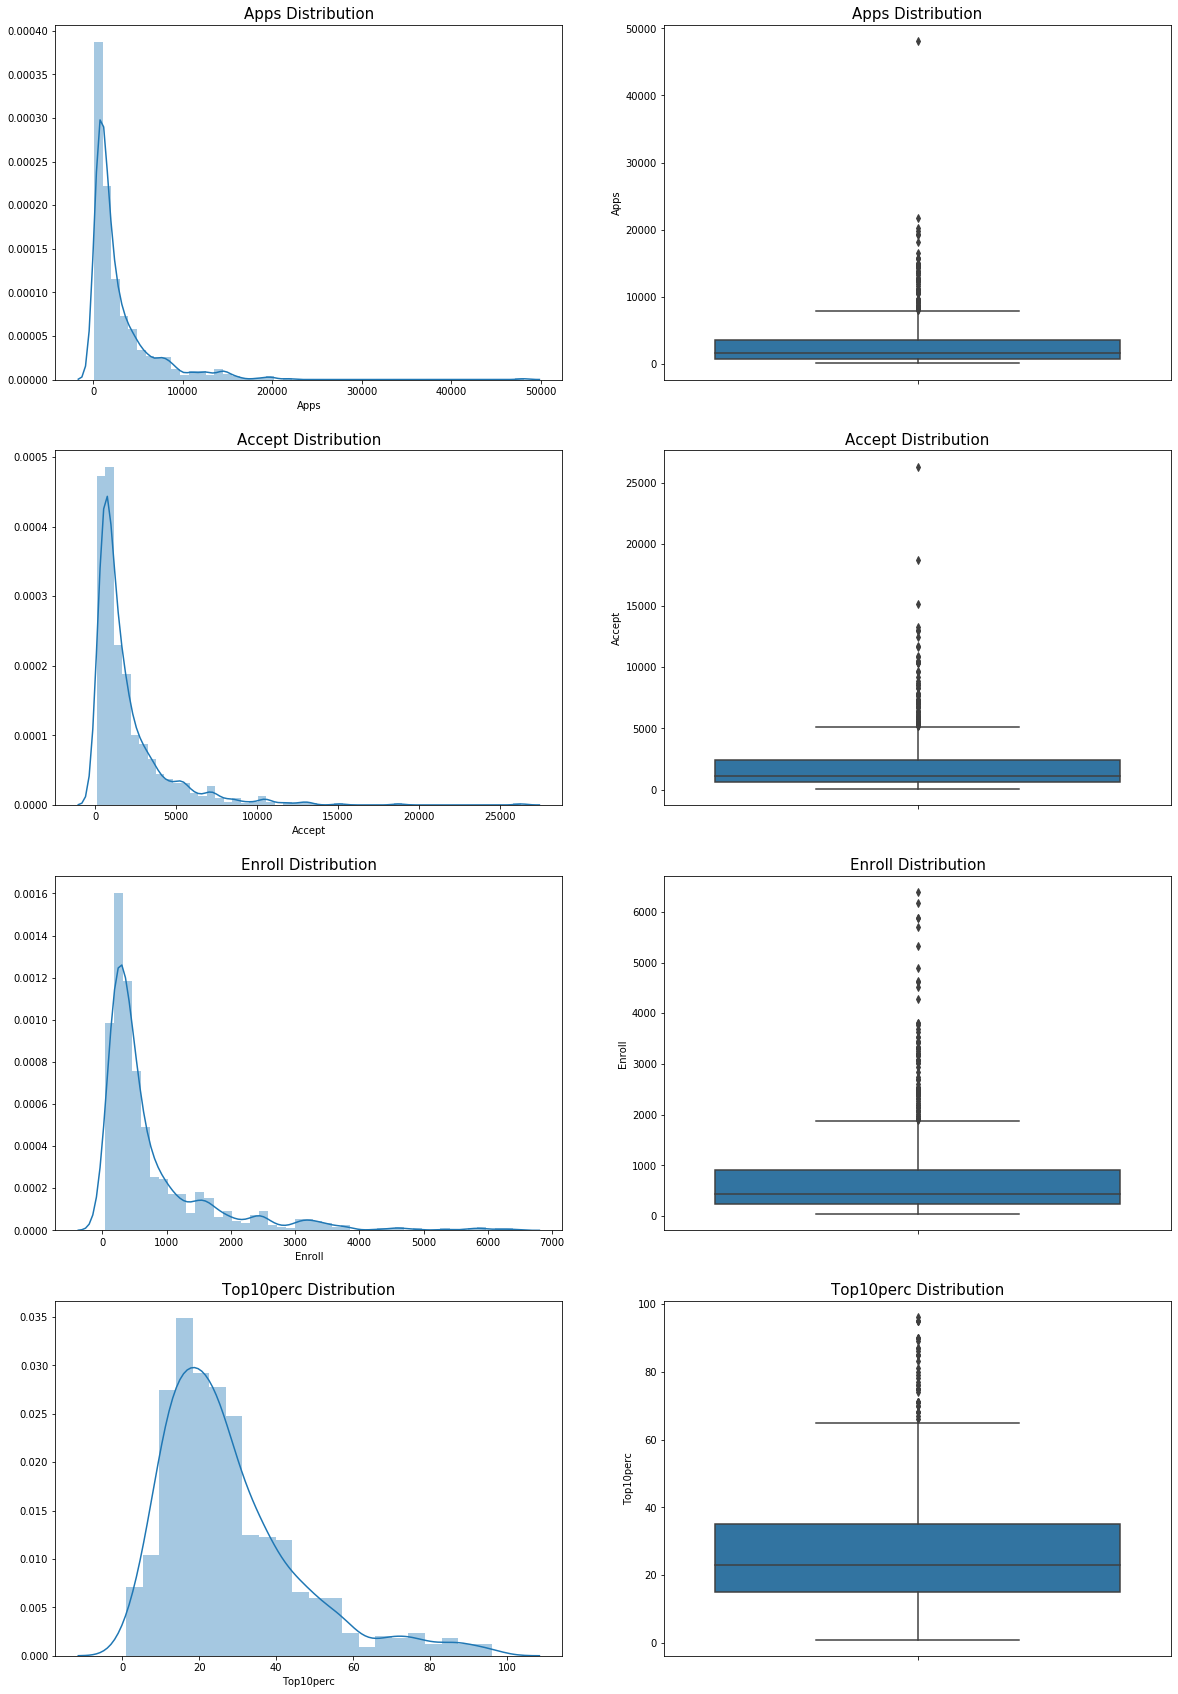

In [28]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 30)
a = sns.distplot(data_df['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)
a = sns.boxplot(data_df['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(data_df['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)

a = sns.boxplot(data_df['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(data_df['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.boxplot(data_df['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=15)


a = sns.distplot(data_df['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.boxplot(data_df['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=15)

plt.show()

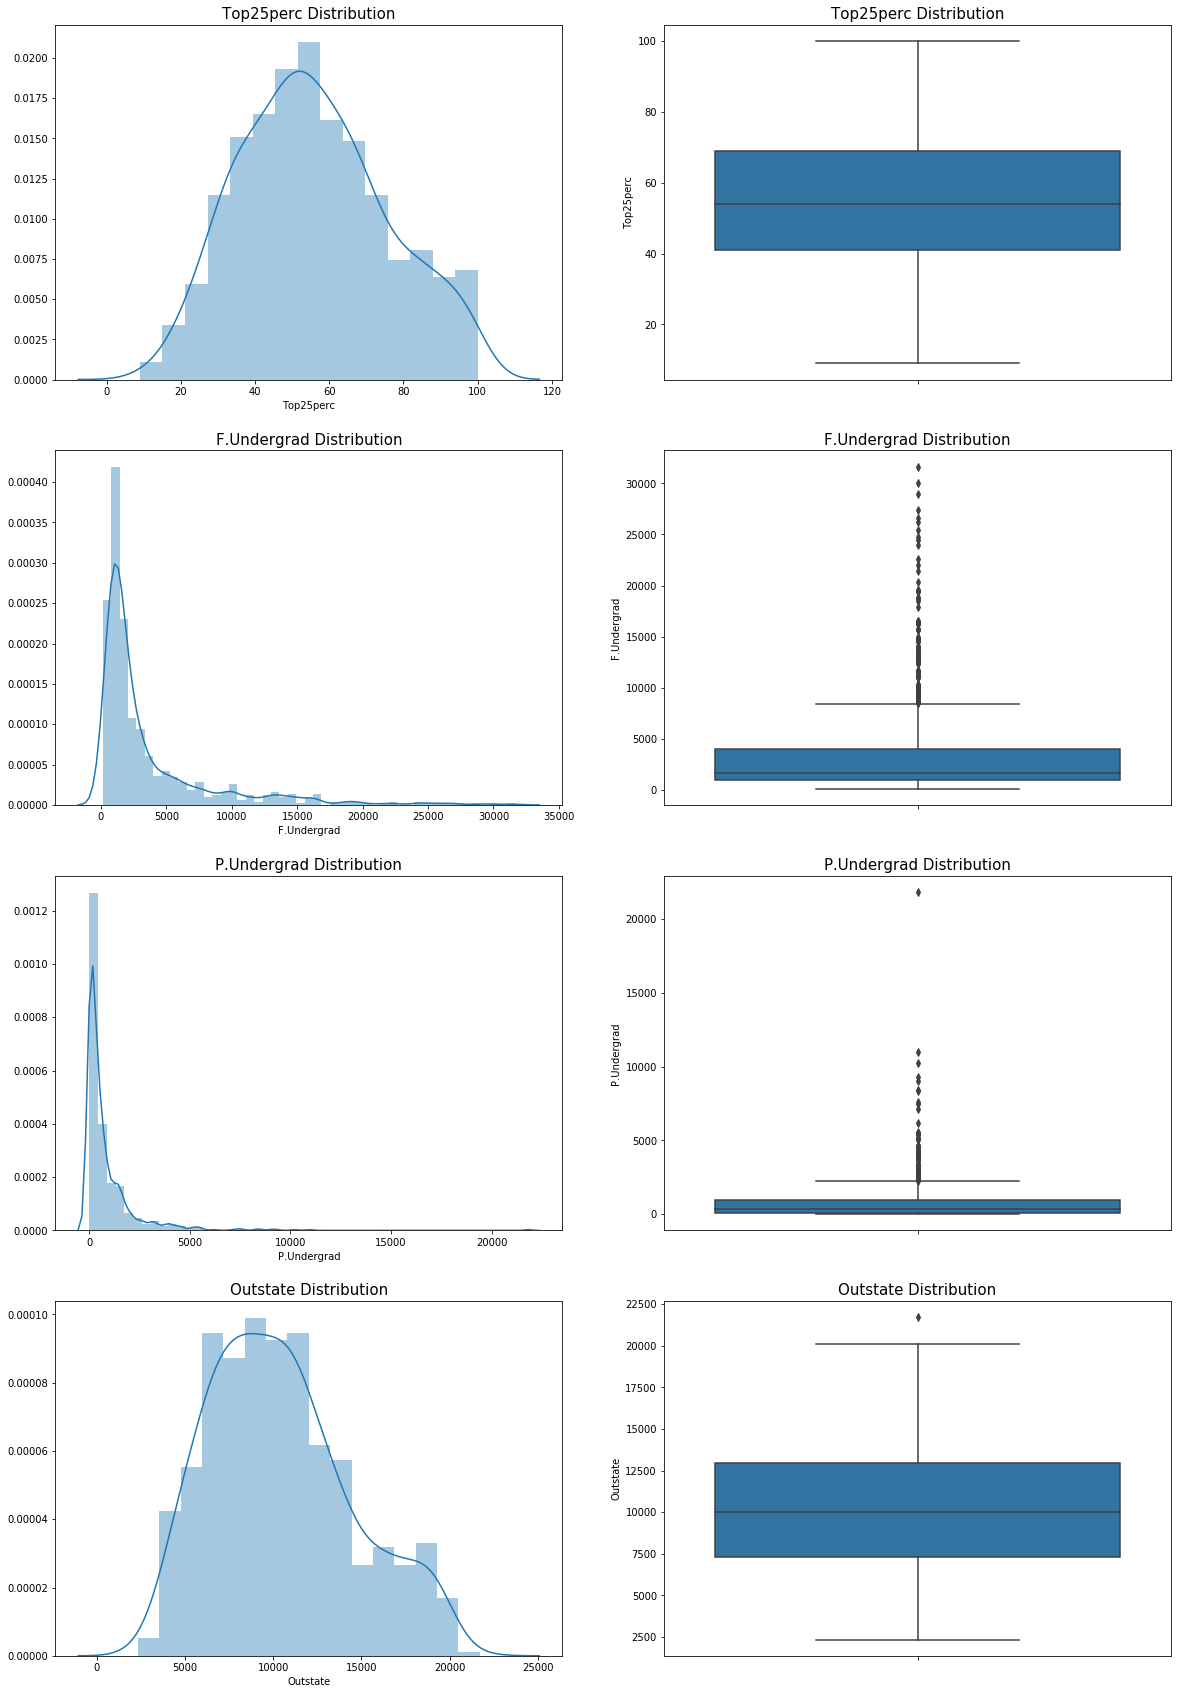

In [54]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 30)
a = sns.distplot(data_df['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=15)
a = sns.boxplot(data_df['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(data_df['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=15)
a = sns.boxplot(data_df['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.distplot(data_df['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=15)
a = sns.boxplot(data_df['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.distplot(data_df['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=15)
a = sns.boxplot(data_df['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=15)

plt.show()

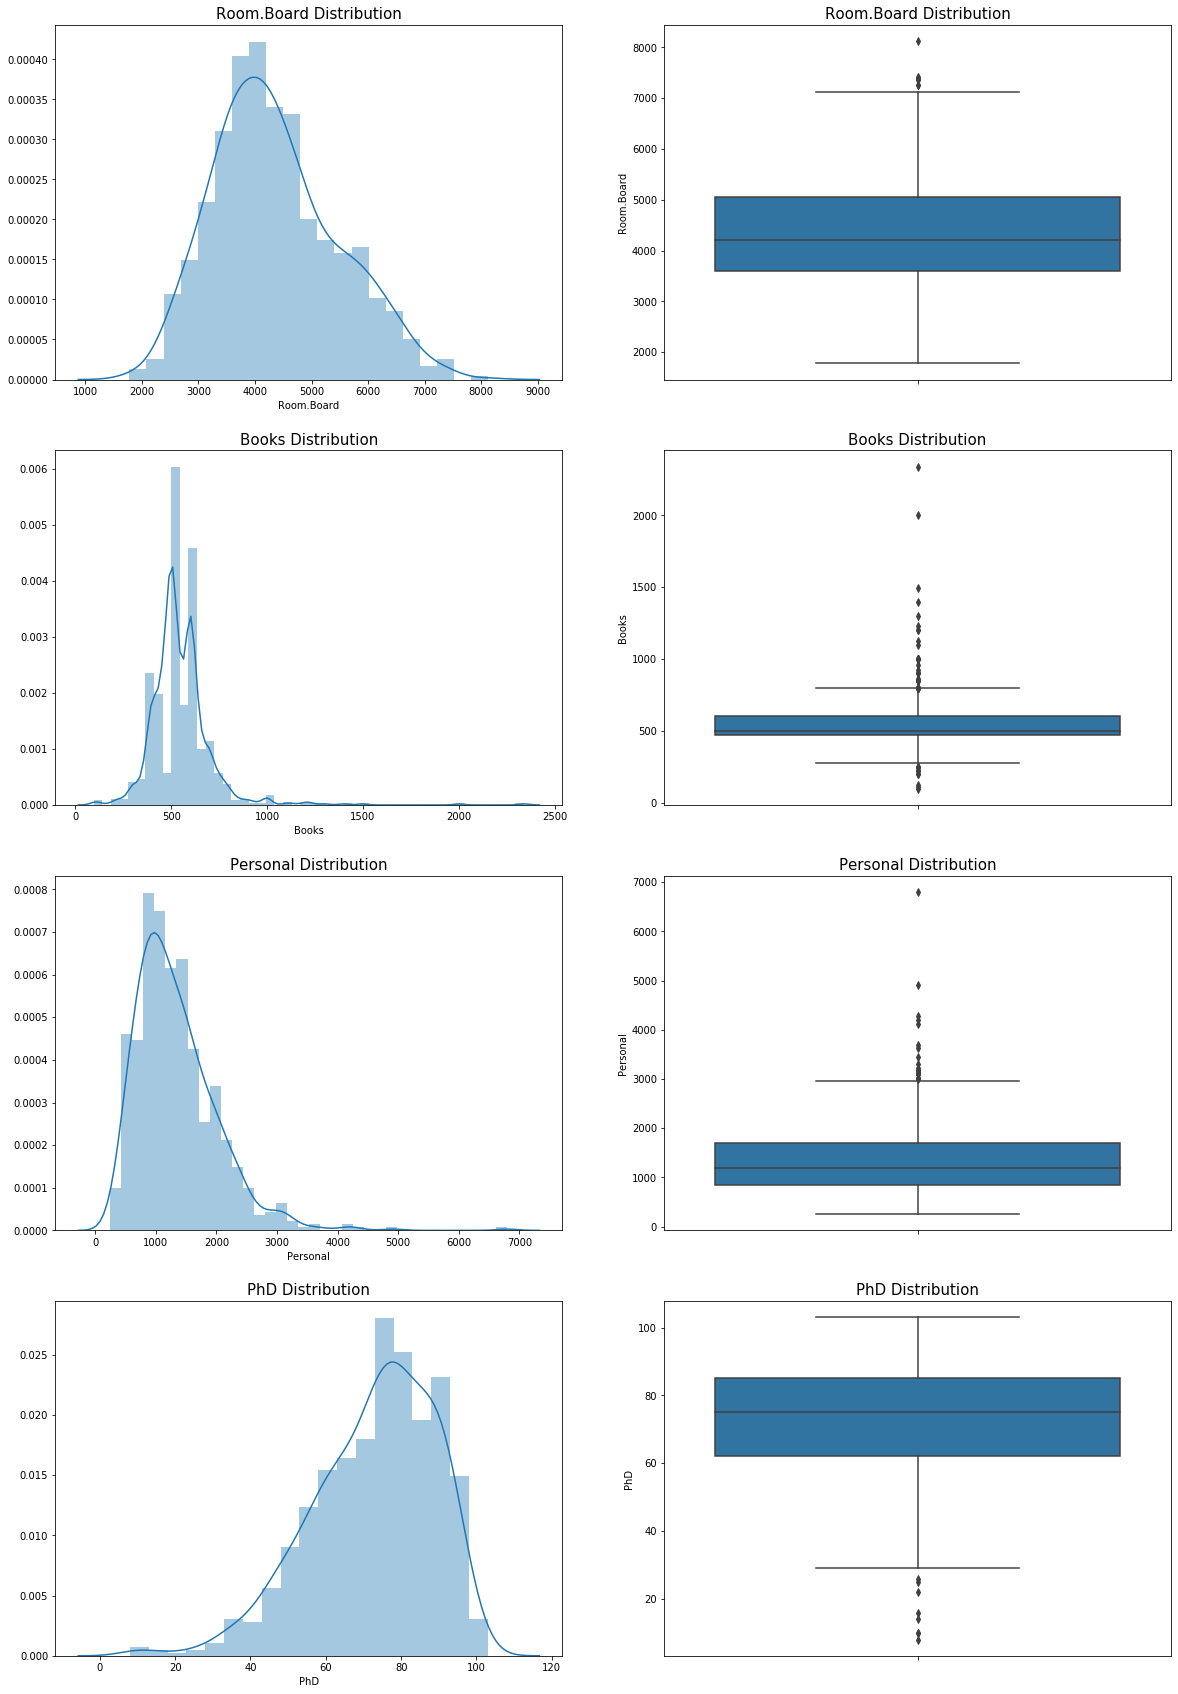

In [55]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 30)
a = sns.distplot(data_df['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=15)
a = sns.boxplot(data_df['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(data_df['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=15)
a = sns.boxplot(data_df['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=15)

a = sns.distplot(data_df['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=15)
a = sns.boxplot(data_df['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=15)


a = sns.distplot(data_df['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=15)
a = sns.boxplot(data_df['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=15)

plt.show()

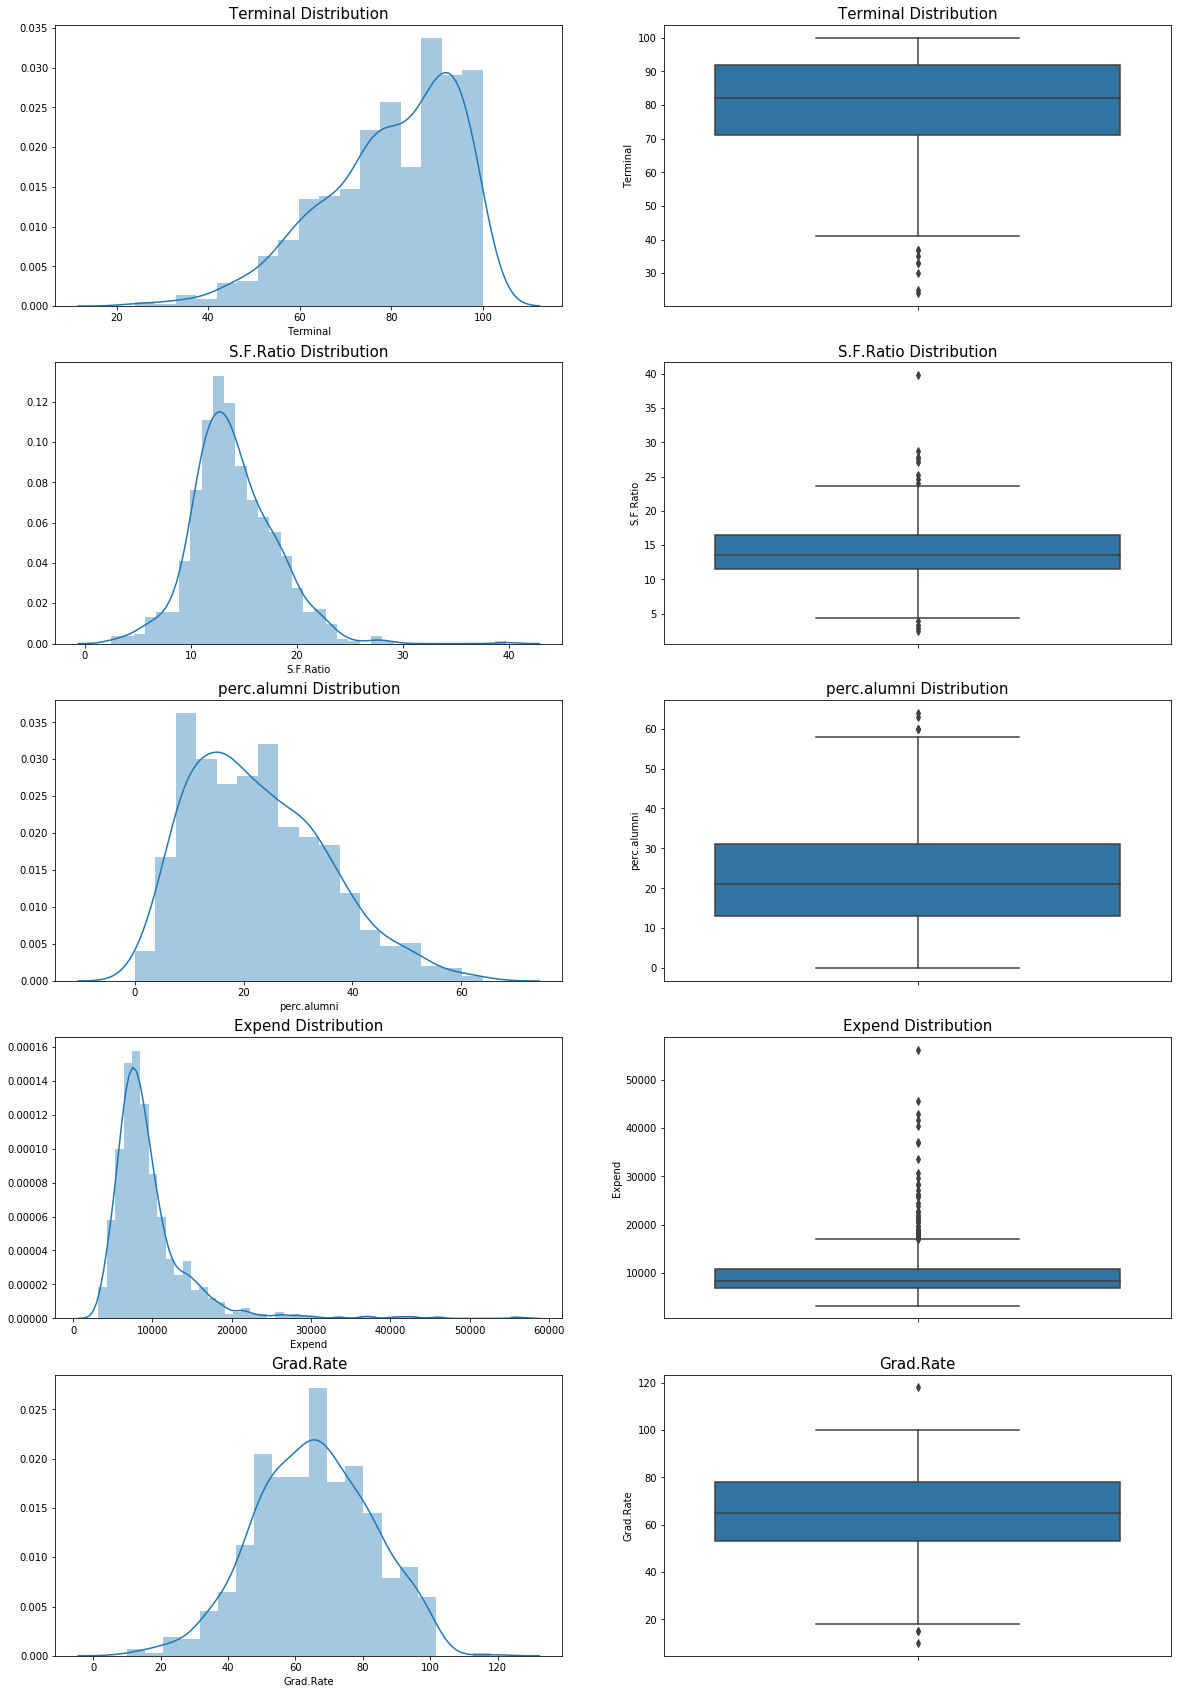

In [23]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 30)
a = sns.distplot(data_df['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=15)
a = sns.boxplot(data_df['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(data_df['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=15)
a = sns.boxplot(data_df['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.distplot(data_df['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=15)
a = sns.boxplot(data_df['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.distplot(data_df['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=15)
a = sns.boxplot(data_df['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=15)

a = sns.distplot(data_df['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate",fontsize=15)
a = sns.boxplot(data_df['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate",fontsize=15)

plt.show()

In [ ]:
# 1) We observe from the plots that the following varaibles have outliers Apps ,Accept,Enroll,Top10perc,Top25perc
# F.Undergrad ,P.Undergrad,Books,Personal,PhD,Terminal,S.F.Ratio,perc,alumni,Expend,Grad.Rate.

# 2 )Outstate and Room.Board variables have very few outliers.

# 3) S.F.Ratio shows some normal distribution.

# 4) Almost all variables show skewness apart from S.F.Ratio.

# Multi- Variate Analysis:

In [30]:
# Check for correlation of variable
data_df.corr(method = 'pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

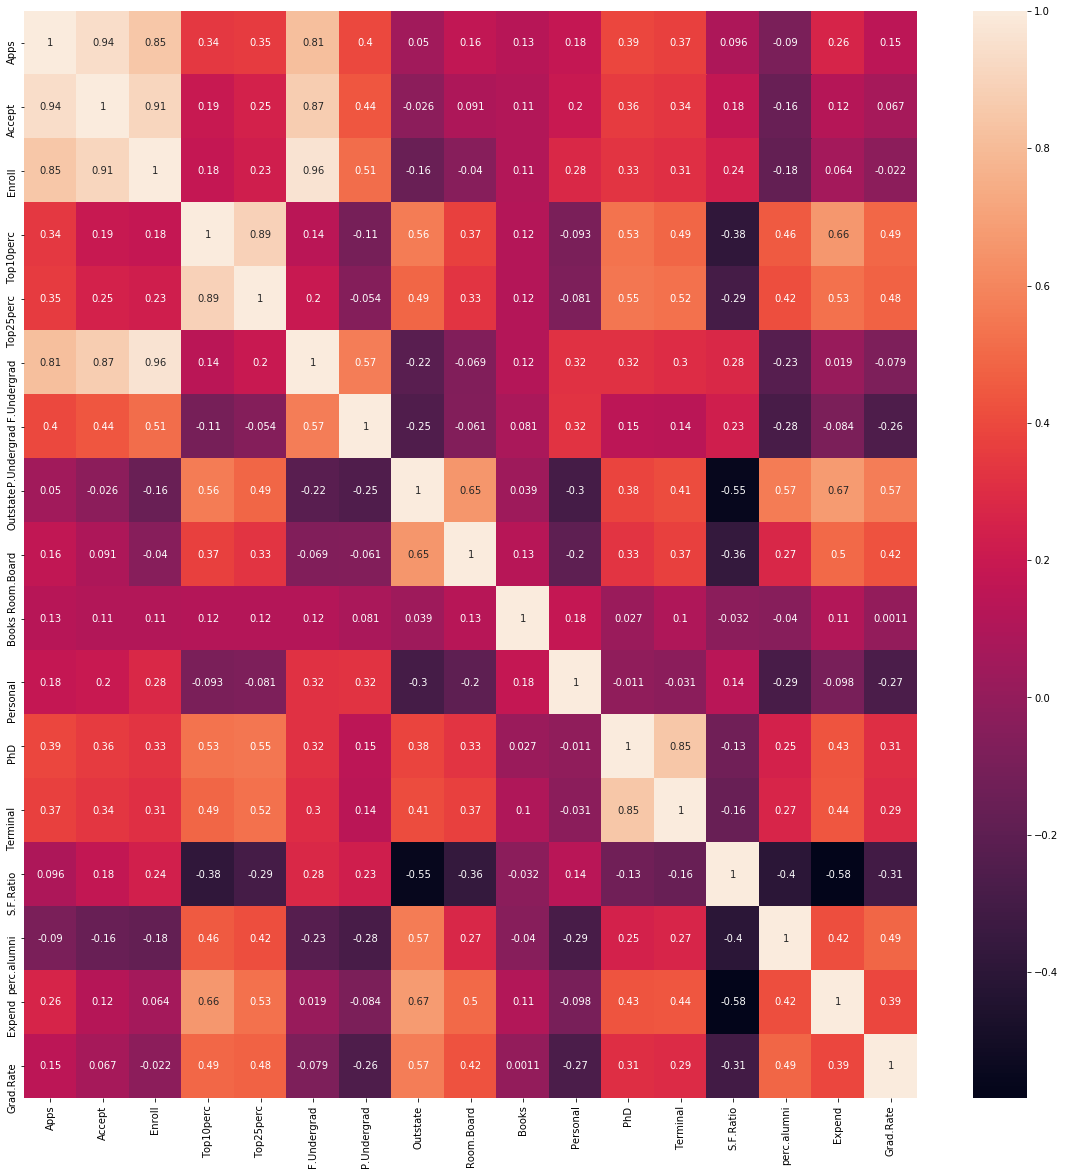

In [31]:
plt.subplots(figsize = (20,20))
sns.heatmap(data_df.corr(),annot=True)

In [ ]:
# We can see that many columns are co-related to each other or in other words the correlation exists for many columns 
# and the highest is between Expend and outstate

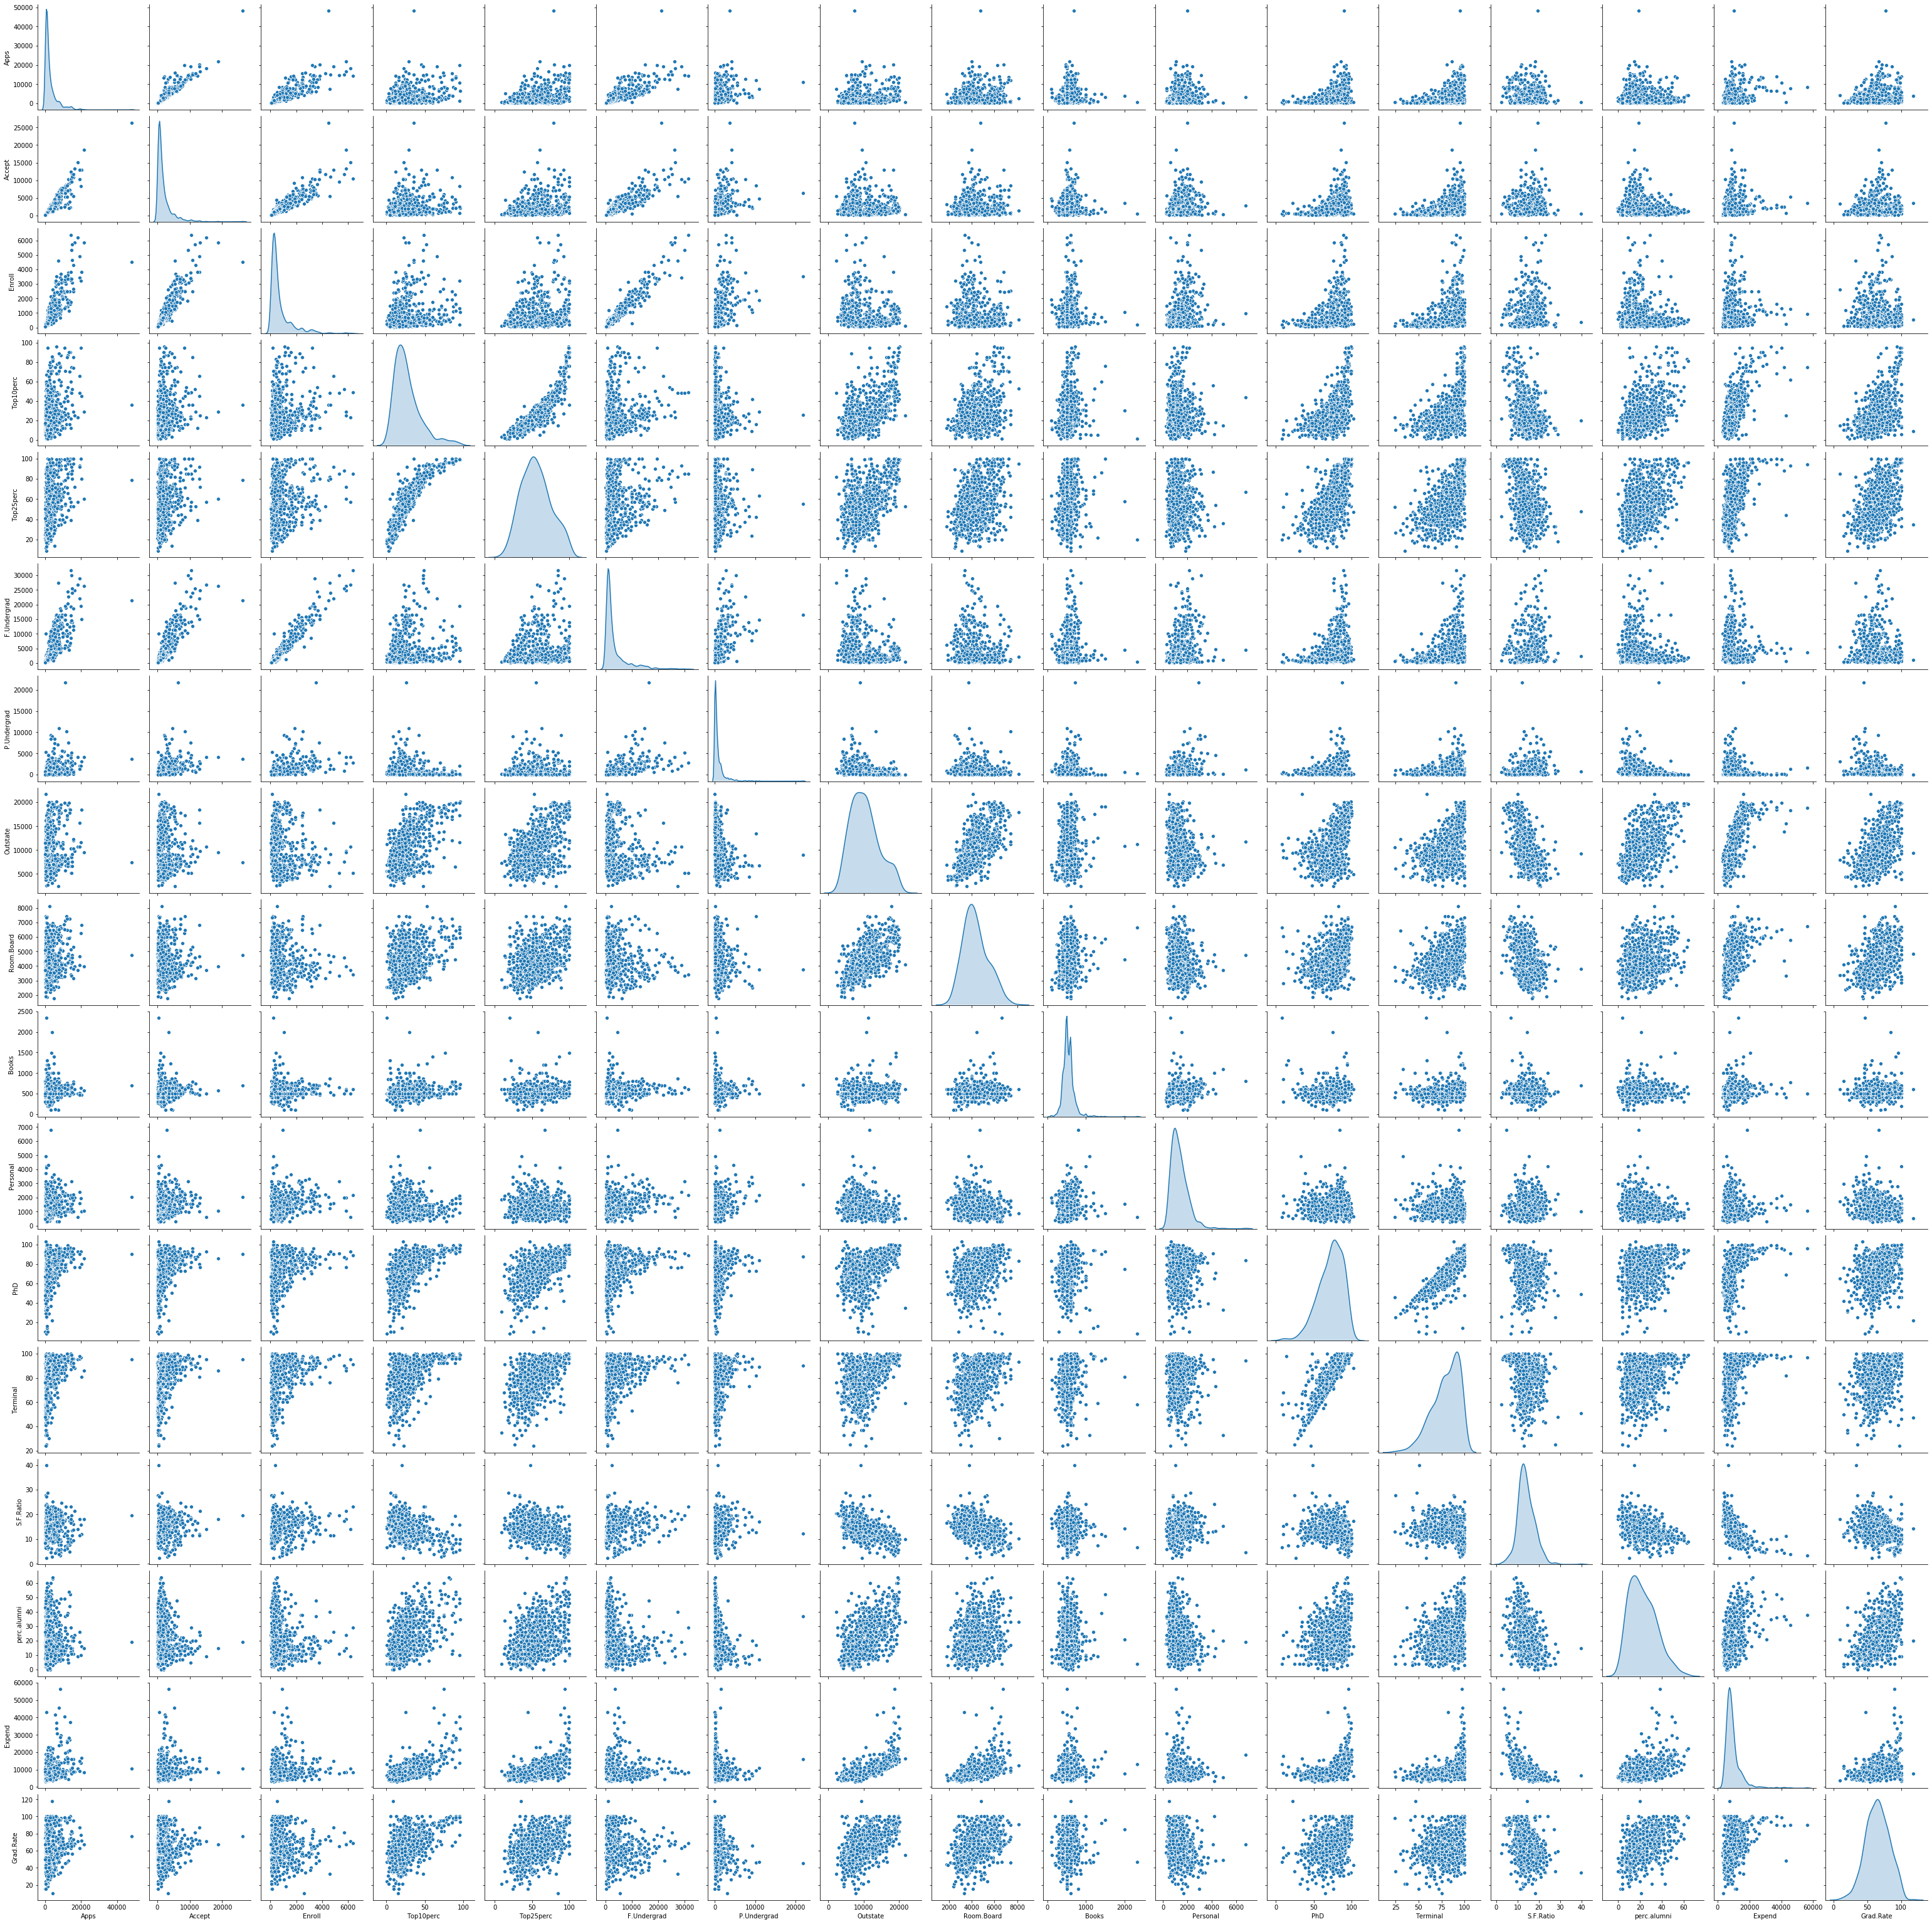

In [32]:
#Let us check for pair plots
sns.pairplot(data_df , diag_kind = 'kde')

In [29]:
# Handling Outliers
def remove_outlier(col):
    sorted(col)
    Q1 , Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    Upper_range = Q3+(1.5 * IQR)
    return lower_range , Upper_range
    

In [30]:
lapps,uapps=remove_outlier(data_df['Apps'])
data_df['Apps']=np.where(data_df['Apps']>uapps,uapps,data_df['Apps'])
data_df['Apps']=np.where(data_df['Apps']<lapps,lapps,data_df['Apps'])

laccept,uaccept=remove_outlier(data_df['Accept'])
data_df['Accept']=np.where(data_df['Accept']>uaccept,uaccept,data_df['Accept'])
data_df['Accept']=np.where(data_df['Accept']<laccept,laccept,data_df['Accept'])


lEnroll,uEnroll=remove_outlier(data_df['Enroll'])
data_df['Enroll']=np.where(data_df['Enroll']> uEnroll, uEnroll,data_df['Enroll'])
data_df['Enroll']=np.where(data_df['Enroll']< lEnroll, lEnroll,data_df['Enroll'])

lTop10perc,uTop10perc=remove_outlier(data_df['Top10perc'])
data_df['Top10perc']=np.where(data_df['Top10perc']> uTop10perc, uTop10perc,data_df['Top10perc'])
data_df['Top10perc']=np.where(data_df['Top10perc']< lTop10perc, lTop10perc,data_df['Top10perc'])


lFUndergrad,uFUndergrad=remove_outlier(data_df['F.Undergrad'])
data_df['F.Undergrad']=np.where(data_df['F.Undergrad']> uFUndergrad, uFUndergrad,data_df['F.Undergrad'])
data_df['F.Undergrad']=np.where(data_df['F.Undergrad']< lFUndergrad, lFUndergrad,data_df['F.Undergrad'])


lPUndergrad,uPUndergrad=remove_outlier(data_df['P.Undergrad'])
data_df['P.Undergrad']=np.where(data_df['P.Undergrad']> uPUndergrad, uPUndergrad,data_df['P.Undergrad'])
data_df['P.Undergrad']=np.where(data_df['P.Undergrad']< lPUndergrad, lPUndergrad,data_df['P.Undergrad'])


lOutstate,uOutstate=remove_outlier(data_df['Outstate'])
data_df['Outstate']=np.where(data_df['Outstate']> uOutstate, uOutstate,data_df['Outstate'])
data_df['Outstate']=np.where(data_df['Outstate']< lOutstate, lOutstate,data_df['Outstate'])


lRoomBoard,uRoomBoard=remove_outlier(data_df['Room.Board'])
data_df['Room.Board']=np.where(data_df['Room.Board']> uRoomBoard, uRoomBoard,data_df['Room.Board'])
data_df['Room.Board']=np.where(data_df['Room.Board']< lRoomBoard, lRoomBoard,data_df['Room.Board'])

lBooks,uBooks=remove_outlier(data_df['Books'])
data_df['Books']=np.where(data_df['Books']> uBooks, uBooks,data_df['Books'])
data_df['Books']=np.where(data_df['Books']< lBooks, lBooks,data_df['Books'])


lPersonal,uPersonal=remove_outlier(data_df['Personal'])
data_df['Personal']=np.where(data_df['Personal']> uPersonal, uPersonal,data_df['Personal'])
data_df['Personal']=np.where(data_df['Personal']< lPersonal, lPersonal,data_df['Personal'])


lPhD,uPhD=remove_outlier(data_df['PhD'])
data_df['PhD']=np.where(data_df['PhD']> uPhD, uPhD,data_df['PhD'])
data_df['PhD']=np.where(data_df['PhD']< lPhD, lPhD,data_df['PhD'])

lTerminal,uTerminal=remove_outlier(data_df['Terminal'])
data_df['Terminal']=np.where(data_df['Terminal']> uTerminal, uTerminal,data_df['Terminal'])
data_df['Terminal']=np.where(data_df['Terminal']< lTerminal, lTerminal,data_df['Terminal'])


lSFRatio,uSFRatio=remove_outlier(data_df['S.F.Ratio'])
data_df['S.F.Ratio']=np.where(data_df['S.F.Ratio']> uSFRatio, uSFRatio,data_df['S.F.Ratio'])
data_df['S.F.Ratio']=np.where(data_df['S.F.Ratio']< lSFRatio, lSFRatio,data_df['S.F.Ratio'])


lPercalumni,uPercalumni=remove_outlier(data_df['perc.alumni'])
data_df['perc.alumni']=np.where(data_df['perc.alumni']> uPercalumni, uPercalumni,data_df['perc.alumni'])
data_df['perc.alumni']=np.where(data_df['perc.alumni']< lPercalumni, lPercalumni,data_df['perc.alumni'])


lExpend,uExpend=remove_outlier(data_df['Expend'])
data_df['Expend']=np.where(data_df['Expend']> uExpend, uExpend,data_df['Expend'])
data_df['Expend']=np.where(data_df['Expend']< lExpend, lExpend,data_df['Expend'])


lGradRate,uGradRate=remove_outlier(data_df['Grad.Rate'])
data_df['Grad.Rate']=np.where(data_df['Grad.Rate']> uGradRate, uGradRate,data_df['Grad.Rate'])
data_df['Grad.Rate']=np.where(data_df['Grad.Rate']< lGradRate, lGradRate,data_df['Grad.Rate'])







# Checking for outliers after handling them.


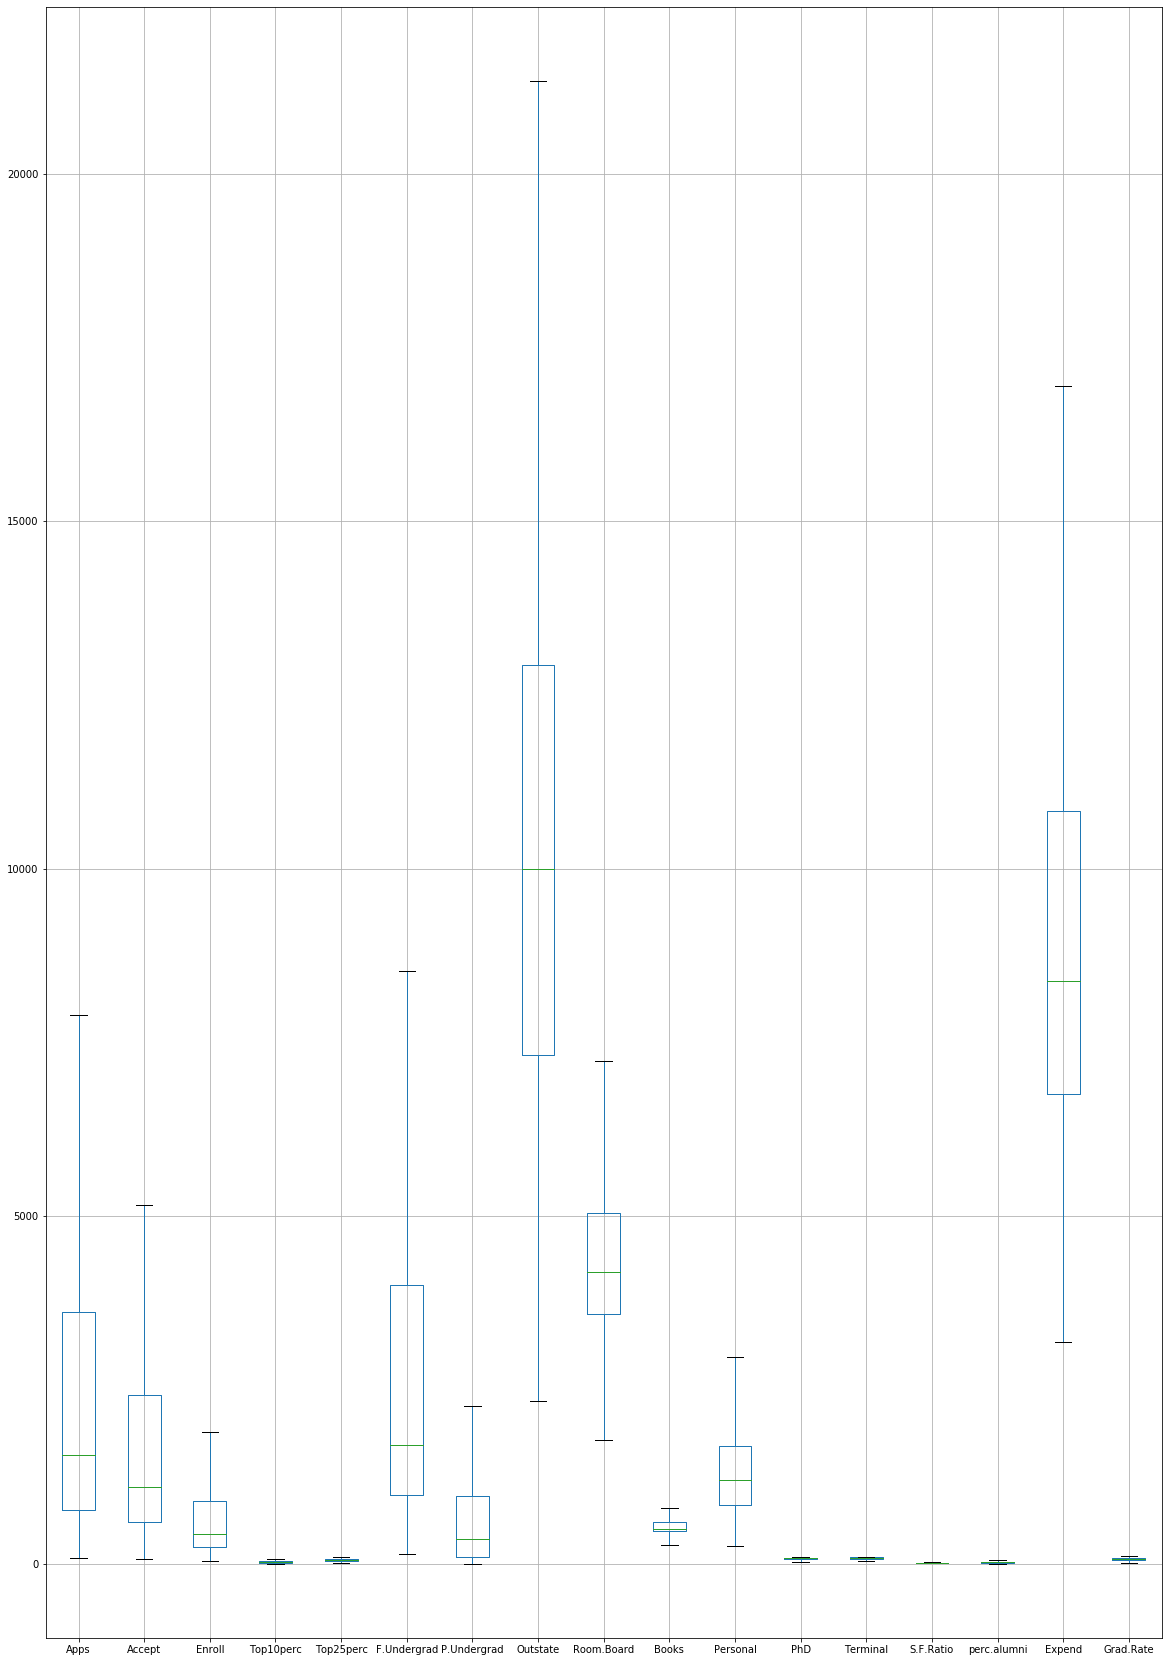

In [31]:
data_df.boxplot(figsize=(20,30))

# 2.2 Scale the variables and write the inference for using the type of scaling function for this case study

In [37]:
#Since Names column has unique values , so will remove it from the dataset.More over there is no point in adding ID for PCA.
data_df_new = data_df.drop(columns ='Names')
data_df_new.head().T

0        1        2        3        4
Apps         1660.0   2186.0   1428.0    417.0    193.0
Accept       1232.0   1924.0   1097.0    349.0    146.0
Enroll        721.0    512.0    336.0    137.0     55.0
Top10perc      23.0     16.0     22.0     60.0     16.0
Top25perc      52.0     29.0     50.0     89.0     44.0
F.Undergrad  2885.0   2683.0   1036.0    510.0    249.0
P.Undergrad   537.0   1227.0     99.0     63.0    869.0
Outstate     7440.0  12280.0  11250.0  12960.0   7560.0
Room.Board   3300.0   6450.0   3750.0   5450.0   4120.0
Books         450.0    750.0    400.0    450.0    795.0
Personal     2200.0   1500.0   1165.0    875.0   1500.0
PhD            70.0     29.0     53.0     92.0     76.0
Terminal       78.0     39.5     66.0     97.0     72.0
S.F.Ratio      18.1     12.2     12.9      7.7     11.9
perc.alumni    12.0     16.0     30.0     37.0      2.0
Expend       7041.0  10527.0   8735.0  16948.5  10922.0
Grad.Rate      60.0     56.0     54.0     59.0     15.5

In [38]:
from scipy.stats import zscore
data_df_new = data_df_new.apply(zscore)
data_df_new.head(10).T

0         1         2         3         4         5  \
Apps        -0.376493 -0.159195 -0.472336 -0.889994 -0.982532 -0.819765   
Accept      -0.337830  0.116744 -0.426511 -0.917871 -1.051221 -0.832474   
Enroll       0.106380 -0.260441 -0.569343 -0.918613 -1.062533 -0.881755   
Top10perc   -0.246780 -0.696290 -0.310996  2.129202 -0.696290  0.716456   
Top25perc   -0.191827 -1.353911 -0.292878  1.677612 -0.596031  0.313426   
F.Undergrad -0.018769 -0.093626 -0.703966 -0.898889 -0.995610 -0.836632   
P.Undergrad -0.166083  0.797856 -0.777974 -0.828267  0.297726 -0.859001   
Outstate    -0.746480  0.457762  0.201488  0.626954 -0.716623  0.761311   
Room.Board  -0.968324  1.921680 -0.555466  1.004218 -0.216006 -0.936213   
Books       -0.776567  1.828605 -1.210762 -0.776567  2.219381 -0.342372   
Personal     1.438500  0.289289 -0.260691 -0.736792  0.289289 -1.065138   
PhD         -0.174045 -2.745731 -1.240354  1.205884  0.202299 -0.362217   
Terminal    -0.123239 -2.785068 -0.952900  1.190391 -0.538069 -0.468931   
S.F.Ratio    1.070602 -0.489511 -0.304413 -1.679429 -0.568839 -1.229904   
perc.alumni -0.870466 -0.545726  0.590864  1.159159 -1.682316 -0.951651   
Expend      -0.630916  0.396097 -0.131845  2.287940  0.512468  0.160409   
Grad.Rate   -0.319205 -0.552693 -0.669437 -0.377577 -2.916759 -0.611065   

                    6         7         8         9  
Apps        -0.916434 -0.277759 -0.633450 -0.821831  
Accept      -0.923783 -0.017264 -0.595991 -0.819993  
Enroll      -0.978287 -0.300809 -0.760651 -0.857183  
Top10perc   -0.632075  0.652240  0.202730 -0.375212  
Top25perc   -0.545505  0.616579  0.363952 -0.596031  
F.Undergrad -0.933723 -0.497184 -0.727312 -0.791792  
P.Undergrad -0.594966 -0.871574 -0.488793 -0.807312  
Outstate     0.709061  0.852873  1.282569  0.006918  
Room.Board   1.251933  0.431722  0.040884 -0.894927  
Books       -0.342372 -0.776567 -2.079153  1.047053  
Personal     0.289289 -0.777836 -1.352441  0.781808  
PhD          1.080436  1.017712  0.390471 -2.055766  
Terminal     0.913837  1.397806  0.291591 -2.681360  
S.F.Ratio   -0.674610 -0.092872 -0.727495 -0.674610  
perc.alumni  0.266124  1.159159  0.022569 -0.626911  
Expend      -0.094724  0.678923  0.725177 -0.056425  
Grad.Rate   -0.144089  0.439631  0.848234 -0.786181

In [ ]:
# Using Z-score we scale the variables in range of -1 to 1 in order to perform PCA. This helps to prevent varaition in data
# during PCA. 

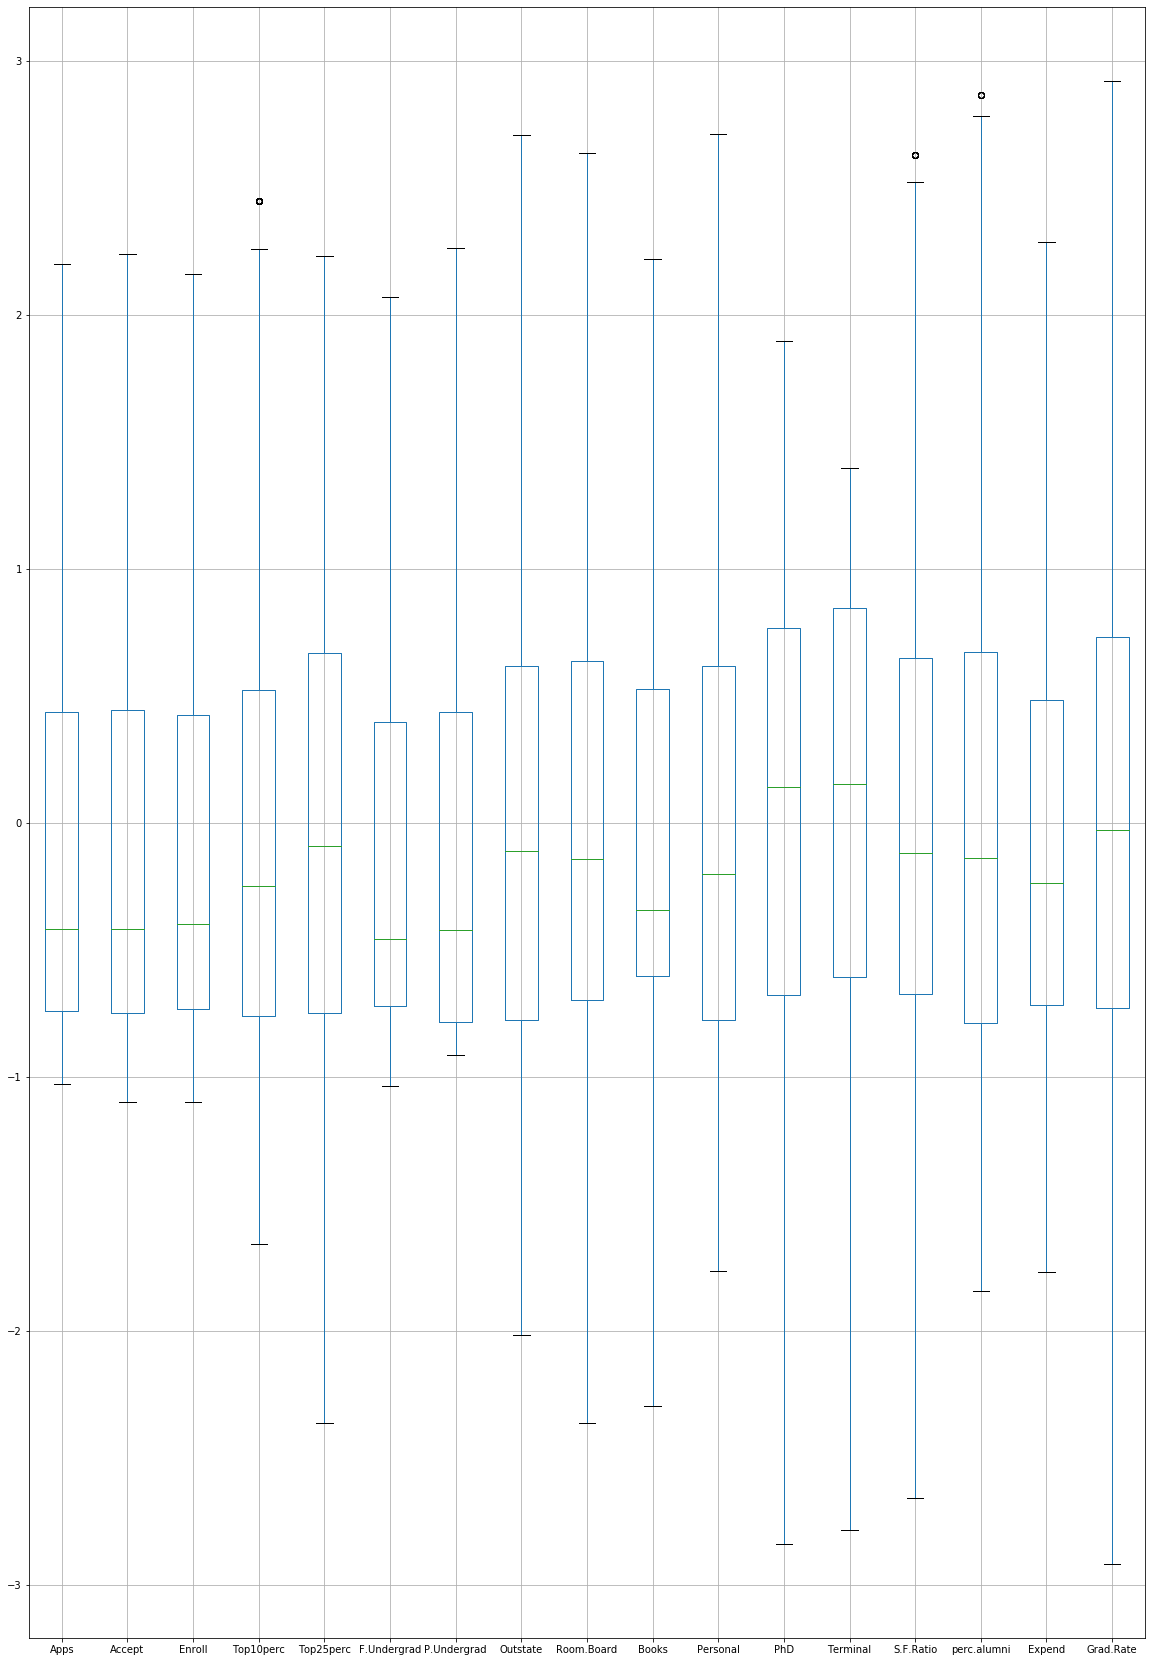

In [34]:
data_df_new.boxplot(figsize=(20,30))

# 2.3 Comment on the comparison between covariance and the correlation matrix.

In [ ]:
#1. Covariance indicates the direction of the linear relationship between variables.

#2. Correlation on the other hand measures both the strength and direction of the linear relationship between two        
#  variables and it is quantified by the Correlation Coeffcients

# 3.Correlation is a function of the covariance

# 4. We can obtain the correlation coefficient of two variables by dividing the covariance of these variables 
#    by the product of the standard deviations of the same values.


# 2.4 Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.


In [35]:
#Before Scaling
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_df < (Q1 - 1.5 * IQR)) | (data_df > (Q3 + 1.5 * IQR))).sum()
outliers

Accept         0
Apps           0
Books          0
Enroll         0
Expend         0
F.Undergrad    0
Grad.Rate      0
Names          0
Outstate       0
P.Undergrad    0
Personal       0
PhD            0
Room.Board     0
S.F.Ratio      0
Terminal       0
Top10perc      0
Top25perc      0
perc.alumni    0
dtype: int64

In [36]:
#After Scaling
Q1 = data_df_new.quantile(0.25)
Q3 = data_df_new.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_df_new < (Q1 - 1.5 * IQR)) | (data_df_new > (Q3 + 1.5 * IQR))).sum()
outliers

Apps            0
Accept          0
Enroll          0
Top10perc      40
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD             0
Terminal        0
S.F.Ratio       8
perc.alumni     6
Expend          0
Grad.Rate       0
dtype: int64

In [ ]:
#We can say that on removing the outliers before scaling there were no outliers in any of the variables. 
#But after scaling we see some outliers in three variables i.e. Top10perc , S.F.Ratio , perc.alumni.

# 2.5 Build the covariance matrix, eigenvalues and eigenvector.

In [43]:
#Covariance Matrix
cov_matrix = np.cov(data_df_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [44]:
 #Get eigen values and eigen vector
eig_vals ,eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]
Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01 -8.10177245e-02  9.87761685e-02
   2.19898081e-01 -2.18800617e-03  2.83715076e-02  8.99498102e-02
  -1.30566998e-01  1.56464458e-01  8.62132843e-02 -1.82169814e-01
   5.99137640e-01 -8.99775288e-02 -8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01 -1.07658626e-01  1.18140437e-01
   1.89634940e-01  1.65212882e-02  1.29584896e-02  1.37606312e-01
  -1.42275847e-01  1.49209799e-01  4.25899061e-02  3.91041719e-01
  -6.61496927e-01 -1.58861886e-01 -4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01 -8.55296892e-02  9.30717094e-03
   1.62314818e-01  6.80794143e-02  1.52403625e-02  1.44216938e-01
  -5.08712481e-02  6.48997860e-02  4.38408622e-02 -7.16684935e-01
  -2.33

# 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

# 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
Perform PCA and export the data of the Principal Component scores into a data frame.

In [45]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('Cummulative Values', cum_var_exp)

Cummulative Values [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


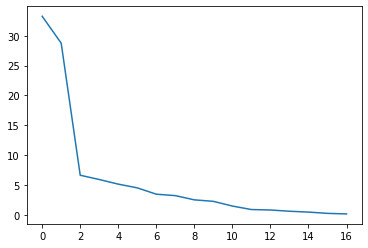

In [46]:
plt.plot(var_exp)

In [ ]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 5 components here. But depending on requirement 90% variation or 6 components will also do good

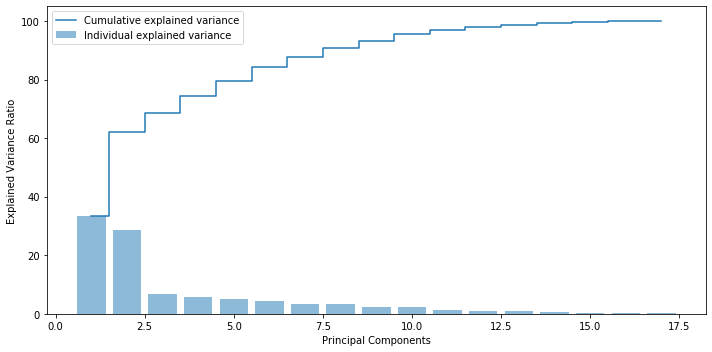

In [47]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [48]:
#Use PCA command from sklearn and find Principal Components
from sklearn.decomposition import PCA

# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 17 to 5)

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(data_df_new)
data_reduced.transpose()

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004476,  2.12212761, -0.50151254, ...,  0.32216045,
         1.32596519, -1.42543833],
       [-1.00842239,  3.13894093, -0.03637348, ..., -0.58725898,
         0.07770804, -1.30027373],
       [-0.36688615,  2.45321222,  0.7659969 , ...,  0.17522516,
         1.36851463,  0.72091776]])

In [49]:
pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177326e-02, -1.07658616e-01, -8.55296879e-02,
         7.88293855e-02,  5.07938249e-02, -7.37077862e-02,
        -4.03568697e-02, -1.49394805e-02,  2.11379168e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134043e-02,
        -5.89785931e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [52]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_df_new))
df_comp.T

0         1         2         3         4
Apps         0.262172  0.314136 -0.081018  0.098776  0.219898
Accept       0.230562  0.344624 -0.107659  0.118140  0.189635
Enroll       0.189276  0.382813 -0.085530  0.009307  0.162315
Top10perc    0.338875 -0.099319  0.078829 -0.369115  0.157211
Top25perc    0.334691 -0.059506  0.050794 -0.416824  0.144449
F.Undergrad  0.163293  0.398636 -0.073708  0.013950  0.102728
P.Undergrad  0.022480  0.357550 -0.040357  0.225351 -0.095679
Outstate     0.283547 -0.251864 -0.014939  0.262975  0.037275
Room.Board   0.244187 -0.131909  0.021138  0.580894 -0.069108
Books        0.096708  0.093974  0.697121 -0.036156  0.035406
Personal    -0.035230  0.232440  0.530973 -0.114983 -0.000475
PhD          0.326411  0.055139 -0.081113 -0.147261 -0.550787
Terminal     0.323116  0.043033 -0.058979 -0.089008 -0.590407
S.F.Ratio   -0.163152  0.259805 -0.274151 -0.259486 -0.142843
perc.alumni  0.186611 -0.257093 -0.103716 -0.223982  0.128216
Expend       0.328956 -0.160009  0.184206  0.213756 -0.022424
Grad.Rate    0.238822 -0.167524 -0.245336 -0.036192  0.356843

# 2.8) Mention the business implication of using the Principal Component Analysis for this case study.

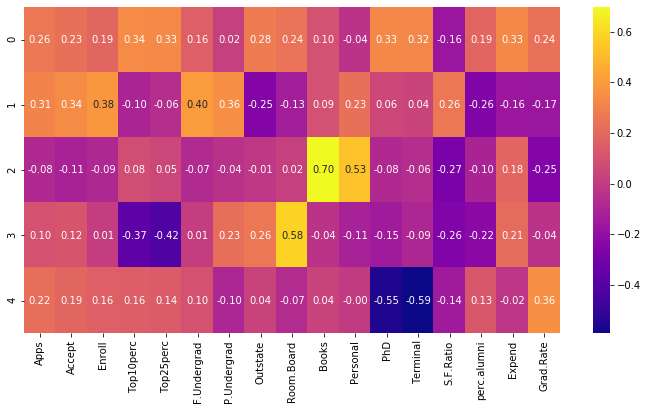

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',annot =True , fmt = '0.2f')

In [ ]:
# 1) This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself.

# 2) PC1 are more related to Top10perc and Top25perc

# 3) PC2 are  related to F.Undergrad and P.Undergrad.

# 4) PC3 could be labeled with books.

# 5) PC4 looks more related to Room.Board

# 6)From this case study , it is very clear that how Principal componenet Analysis helped us reduce
 #the dimensionality, From 17 variables that were being used to predict target varaible, we are able to extract 6 features 
 #that can explain the randomness in the target varaible to almost the same degree.
    